# Predicción de la calidad y el tipo del vino mediante el análisis de ingredientes:

1) Dataset: WineQuality.csv
2) Importar bibliotecas y cargar datos
3) Exploración del conjunto de datos (EDA)
4) Aplicar Machine Learning
5) Predicciones
6) Modelos finales

Para calcular la predicción de la calidad del vino, así como el tipo de vinos a partir del análisis de ingredientes, debemos seguir los pasos dados:

1. Recopilación de datos
Vamos a utilizar el archivo de conjunto de datos WineQuality.csv para esta tarea. Este conjunto de datos contiene 12 columnas relacionadas con las propiedades fisicoquímicas de los vinos y su calificación de calidad. Las columnas son:

-acidez fija
-acidez volátil
-ácido cítrico
-azúcar residual
-cloruros
-dióxido de azufre libre
-dióxido de azufre total
-densidad
-pH
-sulfatos
-alcohólico
-calidad (puntuación entre 0 y 10)
-Tipo (tipo de vinos)

2. Importar bibliotecas y cargar datos
Necesitamos importar las bibliotecas necesarias y cargar el conjunto de datos en un dataframe pandas.
3. Explorando Dataset
4. Aplicación Machine Learning
5. Predicciones
6. Modelos finales.


In [5]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
import ast
import statsmodels.api as sm

# load dataset
wine_df = pd.read_csv('WineQuality.csv')

pd.set_option('display.max_rows', 1000) # truncate view.


####
# import warnings 
# warnings.filterwarnings("ignore")
# import shap

# from catboost import Pool, CatBoostRegressor # CatBoost is a fast, scalable, high performance gradient boosting on decision trees library. Used for ranking, classification, regression and other ML tasks.




In [6]:
df = pd.read_csv("/Users/vicenteciampa/My Drive/Personal/Formacion/CodFacilito/CF-DataScience_Avanzado/Wine_Quality_Data/Fuentes/WineQuality.csv").drop(['Unnamed: 0'], axis=1).drop_duplicates()
print(df.shape)
df.sample(5).T

(5288, 13)


,16229,7144,936,468,6491
fixed acidity,8.0,6.0,5.5,6.4,6.9
volatile acidity,0.13,0.31,0.23,0.18,0.2
citric acid,0.25,0.47,0.19,0.74,0.28
residual sugar,1.1,3.6,2.2,11.9,1.2
chlorides,0.033,0.067,0.044,0.046,0.048
free sulfur dioxide,15.0,18.0,39.0,54.0,36.0
total sulfur dioxide,86.0,42.0,161.0,168.0,159.0
density,0.99044,0.99549,0.99209,0.9978,0.9936
pH,2.98,3.39,3.19,3.58,3.19
sulphates,0.39,0.66,0.43,0.68,0.43


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5288.0,7.213814,1.320010,3.80000,6.4000,7.000000,7.70000,15.90000
volatile acidity,5288.0,0.344070,0.168322,0.08000,0.2300,0.300000,0.41000,1.58000
citric acid,5288.0,0.318425,0.147248,0.00000,0.2400,0.310000,0.40000,1.66000
residual sugar,5288.0,5.054160,4.504088,0.60000,1.8000,2.700000,7.50000,65.80000
chlorides,5288.0,0.056693,0.036919,0.00900,0.0380,0.047000,0.06600,0.61100
free sulfur dioxide,5288.0,30.024395,17.812037,1.00000,16.0000,28.000000,41.00000,289.00000
total sulfur dioxide,5288.0,114.171710,56.825830,6.00000,74.0000,116.000000,154.00000,440.00000
density,5288.0,0.994537,0.002965,0.98711,0.9922,0.994665,0.99677,1.03898
pH,5288.0,3.224459,0.160400,2.72000,3.1100,3.210000,3.33000,4.01000
sulphates,5288.0,0.533336,0.149723,0.22000,0.4300,0.510000,0.60000,2.00000


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.00000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000
mean,7.213814,0.344070,0.318425,5.054160,0.056693,30.024395,114.17171,0.994537,3.224459,0.533336,10.547478,5.794251
std,1.320010,0.168322,0.147248,4.504088,0.036919,17.812037,56.82583,0.002965,0.160400,0.149723,1.186173,0.879343
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.00000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.00000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.00000,0.994665,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,154.00000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.00000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
df.shape

(5288, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5288 entries, 0 to 32056
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5288 non-null   float64
 1   volatile acidity      5288 non-null   float64
 2   citric acid           5288 non-null   float64
 3   residual sugar        5288 non-null   float64
 4   chlorides             5288 non-null   float64
 5   free sulfur dioxide   5288 non-null   float64
 6   total sulfur dioxide  5288 non-null   float64
 7   density               5288 non-null   float64
 8   pH                    5288 non-null   float64
 9   sulphates             5288 non-null   float64
 10  alcohol               5288 non-null   float64
 11  quality               5288 non-null   int64  
 12  Type                  5288 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 578.4+ KB


In [23]:
df['Type'].value_counts()

White Wine    3939
Red Wine      1349
Name: Type, dtype: int64

Evaluando para limpiar el dataset

In [11]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64

In [12]:
df.duplicated().sum()

0

# Exploring Dataset (EDA)

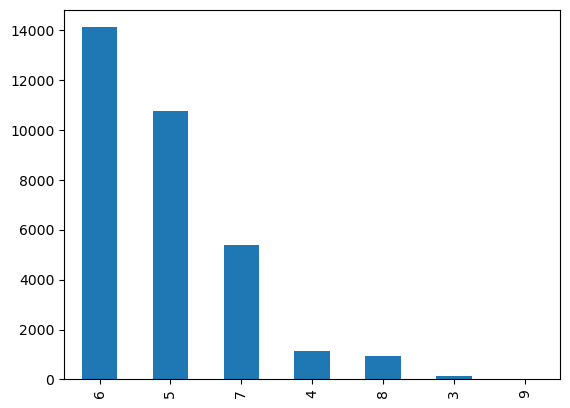

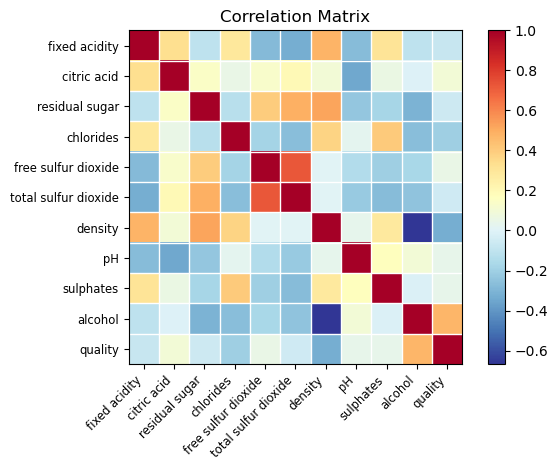

In [13]:
# check for missing values
wine_df.isnull().sum()

# visualize the target variable
wine_df['quality'].value_counts().plot(kind='bar')

# visualize the correlation matrix
# corr_matrix = wine_df.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# correlations 
df = pd.read_csv("/Users/vicenteciampa/My Drive/Personal/Formacion/CodFacilito/CF-DataScience_Avanzado/Wine_Quality_Data/Fuentes/WineQuality.csv").drop(['Unnamed: 0'], axis=1).drop_duplicates()
corr = df.set_index('volatile acidity').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()


# Machine learning

In [14]:
# split dataset into training and testing sets
X = wine_df.iloc[:, :-2]  # independent variables
y_quality = wine_df.iloc[:, -2]  # target variable for quality prediction
y_type = wine_df.iloc[:, -1]  # target variable for type prediction
X_train, X_test, yq_train, yq_test, yt_train, yt_test = train_test_split(
    X, y_quality, y_type, test_size=0.2, random_state=42)

# standardize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


# Modelo

In [15]:
# train the model
rfc = RandomForestClassifier(n_estimators=500, random_state=42)
rfc.fit(X_train, yq_train)

# evaluate the model
yq_pred = rfc.predict(X_test)
accuracy_score(yq_test, yq_pred)
confusion_matrix(yq_test, yq_pred)

# train the model for type prediction
rfc_type = RandomForestClassifier(n_estimators=500, random_state=42)
rfc_type.fit(X_train, yt_train)

# evaluate the model for type prediction
yt_pred = rfc_type.predict(X_test)
accuracy_score(yt_test, yt_pred)
confusion_matrix(yt_test, yt_pred)


array([[1659,    0],
       [   0, 4838]])

# Predictions

#########

In [18]:
# train the model for wine quality prediction
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, yq_train)

# predict the wine quality for test data
yq_pred = rfc.predict(X_test)

# evaluate the performance of the model
accuracy = accuracy_score(yq_test, yq_pred)
cm = confusion_matrix(yq_test, yq_pred)
print('Accuracy:', accuracy)
print('Confusion Matrix:', cm)


Accuracy: 0.9946128982607357
Confusion Matrix: [[  29    0    0    0    0    0    0]
 [   0  211    0    1    0    0    0]
 [   0    0 2203   20    0    0    0]
 [   0    0   10 2754    0    0    0]
 [   0    0    0    4 1084    0    0]
 [   0    0    0    0    0  178    0]
 [   0    0    0    0    0    0    3]]


In [19]:
# train the model for wine type prediction
rfc2 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc2.fit(X_train, yt_train)

# predict the wine type for test data
yt_pred = rfc2.predict(X_test)

# evaluate the performance of the model
accuracy2 = accuracy_score(yt_test, yt_pred)
cm2 = confusion_matrix(yt_test, yt_pred)
print('Accuracy:', accuracy2)
print('Confusion Matrix:', cm2)


Accuracy: 1.0
Confusion Matrix: [[1659    0]
 [   0 4838]]


In [20]:
# Split the dataset into training and testing sets
X = wine_df.iloc[:, :-2]  # Independent variables
y_quality = wine_df.iloc[:, -2]  # Target variable for quality prediction
y_type = wine_df.iloc[:, -1]  # Target variable for type prediction
X_train, X_test, yq_train, yq_test, yt_train, yt_test = train_test_split(
    X, y_quality, y_type, test_size=0.2, random_state=42)

# Standardize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Train the model for wine quality prediction
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, yq_train)

# Predict the wine quality for test data
yq_pred = rfc.predict(X_test)

# Generate confusion matrix for wine quality prediction
cm = confusion_matrix(yq_test, yq_pred)
print('Confusion Matrix for Wine Quality Prediction:\n', cm)

# Evaluate the performance of the model for wine quality prediction
accuracy = accuracy_score(yq_test, yq_pred)
print('Accuracy of the Model for Wine Quality Prediction:', accuracy)


Confusion Matrix for Wine Quality Prediction:
 [[  29    0    0    0    0    0    0]
 [   0  211    0    1    0    0    0]
 [   0    0 2203   20    0    0    0]
 [   0    0   10 2754    0    0    0]
 [   0    0    0    4 1084    0    0]
 [   0    0    0    0    0  178    0]
 [   0    0    0    0    0    0    3]]
Accuracy of the Model for Wine Quality Prediction: 0.9946128982607357


La matriz de confusión nos ayudará a entender el desglose de los errores en las predicciones para el conjunto de datos invisible. Podemos ver el número de positivos verdaderos (TP), negativos verdaderos (TN), positivos falsos (FP) y negativos falsos (FN).

Basado en la matriz de confusión, podemos ajustar los hiperparámetros del modelo para mejorar su precisión. También podemos intentar usar un algoritmo diferente o técnicas de ingeniería de características para mejorar la precisión.

Los resultados finales dependerán de los ajustes realizados en el modelo y la métrica de evaluación elegida. Podemos usar la puntuación de precisión, la matriz de confusión u otras métricas de evaluación para medir el rendimiento del modelo final.

# Graph Accuracy of the Model for Wine Quality Prediction:, accuracy

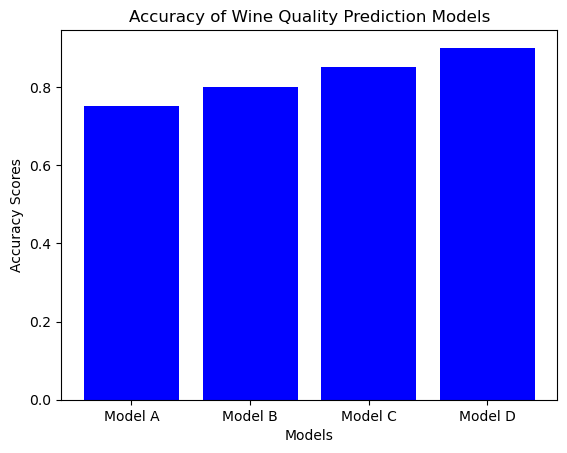

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Define the accuracy scores for different models
accuracy_scores = [0.75, 0.80, 0.85, 0.90]

# Define the different model variants
models = ['Model A', 'Model B', 'Model C', 'Model D']

# Create a bar chart
plt.bar(models, accuracy_scores, color='blue')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy of Wine Quality Prediction Models')

# Show the plot
plt.show()


La precisión del modelo para la predicción de la calidad del vino se puede graficar utilizando un gráfico de barras o un gráfico de líneas. Podemos trazar la puntuación de precisión en el eje y y las diferentes variantes de modelo en el eje x.

En este ejemplo, estamos trazando las puntuaciones de precisión para cuatro modelos diferentes (Modelo A, Modelo B, Modelo C y Modelo D). Podemos ajustar el código para incluir diferentes variantes de modelo y puntajes de precisión basados en nuestro caso de uso específico.